# 【問題1】ダーツのまとを選ぶ

In [155]:
import numpy as np
from numpy.random import *
import random
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# ダーツのまとを用意
set_target = np.arange(1,7)

# まとを選出
target  = random.choice(set_target)
print("選出されたまと番号: {}".format(target))

選出されたまと番号: 5


# 【問題2】ダーツを投げて、刺さった場所を記録する

In [39]:
mu = [0, 0] # 平均ベクトル
sigma = [[0.01,0],[0,0.01]]  # 共分散行列
np.random.seed(0)
try_times = 10 # 投げる回数
 
# 2次元正規乱数を500個生成
values = multivariate_normal(mu, sigma, try_times)
values.shape
values

array([[ 0.17640523,  0.04001572],
       [ 0.0978738 ,  0.22408932],
       [ 0.1867558 , -0.09772779],
       [ 0.09500884, -0.01513572],
       [-0.01032189,  0.04105985],
       [ 0.01440436,  0.14542735],
       [ 0.07610377,  0.0121675 ],
       [ 0.04438632,  0.03336743],
       [ 0.14940791, -0.02051583],
       [ 0.03130677, -0.08540957]])

In [157]:
# まと番号を結合
target_culumn = np.full((1, try_times),target)

In [41]:
record = np.concatenate((values,target_culumn.T), axis=1)
record

array([[ 0.17640523,  0.04001572,  3.        ],
       [ 0.0978738 ,  0.22408932,  3.        ],
       [ 0.1867558 , -0.09772779,  3.        ],
       [ 0.09500884, -0.01513572,  3.        ],
       [-0.01032189,  0.04105985,  3.        ],
       [ 0.01440436,  0.14542735,  3.        ],
       [ 0.07610377,  0.0121675 ,  3.        ],
       [ 0.04438632,  0.03336743,  3.        ],
       [ 0.14940791, -0.02051583,  3.        ],
       [ 0.03130677, -0.08540957,  3.        ]])

# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

In [159]:
try_times = 1000 # ダーツを1000回投げる
throw_result = {}

for i in range(try_times):
    
    target  = random.choice(set_target)
    
    mu = [0, 0] # 平均ベクトル
    sigma = [[0.01,0],[0,0.01]]  # 共分散行列
    # np.random.seed(0)
    try_times = 1 # 投げる回数

    # 2次元正規乱数を生成
    values = multivariate_normal(mu, sigma, try_times)
    
    # 辞書に追加
    if target in throw_result:
            throw_result[target] = np.concatenate((throw_result[target], values))
    else:
        throw_result[target] = values
    
print(throw_result)

{3: array([[ 4.74979762e-04, -6.97676533e-02],
       [-6.79162852e-02,  5.77263364e-02],
       [ 1.71736562e-01, -3.40839361e-02],
       [ 1.63776009e-03, -8.75995797e-02],
       [ 9.35266620e-03,  3.66705087e-02],
       [ 4.98697878e-02, -3.29170988e-02],
       [ 1.64800863e-01, -9.98144951e-02],
       [ 9.33957566e-02,  9.12298377e-02],
       [-5.70885598e-02,  3.78626071e-02],
       [-9.72595129e-02,  1.09356455e-01],
       [ 1.77603864e-01, -1.25171224e-03],
       [-1.31515391e-02,  6.23575124e-02],
       [-2.57561586e-02,  1.03108200e-01],
       [-1.44930609e-01, -1.29117782e-01],
       [-7.54469967e-02, -1.07261866e-01],
       [ 1.03487790e-01,  1.96583330e-01],
       [ 3.77348931e-02,  1.40687615e-01],
       [ 8.76617650e-02,  1.43397316e-01],
       [ 8.49479249e-02, -1.41661882e-02],
       [-1.05523430e-01,  2.20506735e-01],
       [-7.10127939e-02, -1.19703005e-02],
       [-2.75582423e-02, -1.38473054e-02],
       [-2.34194376e-02, -6.09440259e-02],
       

# 【問題4】ダーツのまとと刺さった位置を描画する

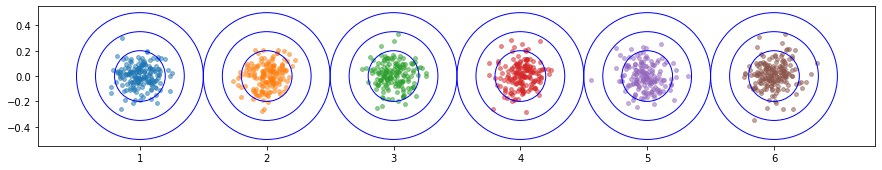

In [136]:
fig = plt.figure(figsize=(15.0, 8.0))
ax = plt.axes()

for i in range(1,7):
    plt.scatter(throw_result[i][:, 0] +i, throw_result[i][:, 1], s=15, alpha=0.5)
    
    c1 = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='b', fill=False)
    c2 = patches.Circle(xy=(i, 0), radius=0.35, fc='g', ec='b', fill=False)
    c3 = patches.Circle(xy=(i, 0), radius=0.2, fc='g', ec='b', fill=False)

    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)

plt.axis('scaled')
ax.set_aspect('equal')


# 【問題5】関数化

In [138]:
def darts_game(throw_times=1000, target_number=6):

    # ダーツのまとを用意
    set_target = np.arange(1,target_number + 1)

    # 結果を入れる配列
    throw_result = {}

    for i in range(throw_times):
        
        target = random.choice(set_target)
        
        mu = [0, 0] # 平均ベクトル
        sigma = [[0.01,0],[0,0.01]]  # 共分散行列
        # np.random.seed(0)
        throw_times = 1 # 投げる回数

        # 2次元正規乱数を生成
        values = multivariate_normal(mu, sigma, throw_times)
        
        # 辞書に追加
        if target in throw_result:
                throw_result[target] = np.concatenate((throw_result[target], values))
        else:
            throw_result[target] = values

    # まとを描画する
    fig = plt.figure(figsize=(15.0, 8.0))
    ax = plt.axes()

    for i in range(1,target_number + 1):
        plt.scatter(throw_result[i][:, 0] +i, throw_result[i][:, 1], s=15, alpha=0.5)
        
        c1 = patches.Circle(xy=(i, 0), radius=0.5, fc='g', ec='b', fill=False)
        c2 = patches.Circle(xy=(i, 0), radius=0.35, fc='g', ec='b', fill=False)
        c3 = patches.Circle(xy=(i, 0), radius=0.2, fc='g', ec='b', fill=False)

        ax.add_patch(c1)
        ax.add_patch(c2)
        ax.add_patch(c3)

    plt.axis('scaled')
    ax.set_aspect('equal')

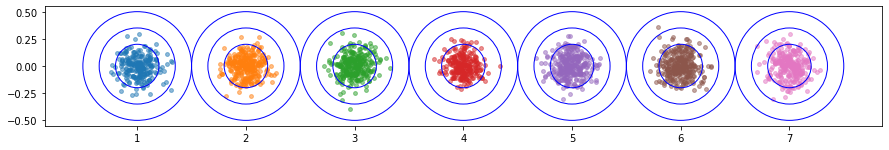

In [147]:
darts_game(2000,7)